In [2]:
from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
iris = datasets.load_iris()

In [4]:
X_iris = iris.data
Y_iris = iris.target

In [10]:
x = pd.DataFrame(iris.data, columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
# Otra forma de cargar los datos a la variable x
#x = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns = ['Target'])
x.head(10)

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


Text(0, 0.5, 'Petal Width')

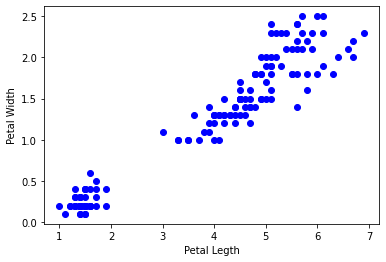

In [11]:
plt.scatter(x['Petal Length'], x['Petal Width'], c = 'blue')
plt.xlabel('Petal Legth', fontsize = 10)
plt.ylabel('Petal Width', fontsize = 10)

Text(0, 0.5, 'Sepal Width')

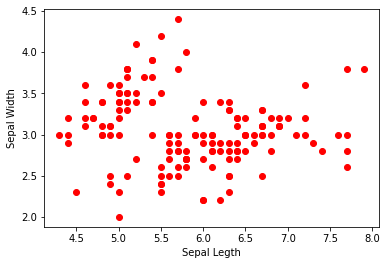

In [12]:
plt.scatter(x['Sepal Length'], x['Sepal Width'], c = 'red')
plt.xlabel('Sepal Legth', fontsize = 10)
plt.ylabel('Sepal Width', fontsize = 10)

In [48]:
model  = KMeans(n_clusters=3, max_iter=1000) #n_cluster son para los datos de los centroides K
#Cuando se usó el valor de 2, mas adelante dió un valor de accuracy = 0.53.. además un valor >= 4 de igual forma decae la presicion
model.fit(x) #Entranamiento usando los puntos de x
y_labels = model.labels_

In [49]:
y_kmeans = model.predict(x)
print('Predicciones ', y_kmeans)

Predicciones  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [50]:
#Obteniendo su precision
from sklearn import metrics

accuracy = metrics.adjusted_rand_score(Y_iris, y_kmeans)
print(accuracy)

0.7302382722834697


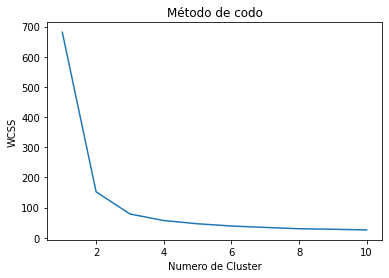

In [51]:
from sklearn.cluster import KMeans
#Visualización del funcionamiento del método de codo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, max_iter=1000, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Método de codo')
plt.xlabel('Numero de Cluster')
plt.ylabel('WCSS')
plt.show()

Text(0, 0.5, 'Petal Width')

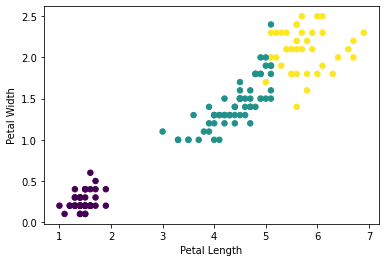

In [52]:
plt.scatter(x['Petal Length'], x['Petal Width'], c = y_kmeans, s = 30) #s: es para el tamaño de los puntos
#c: muestra el color de y_kmeans con respecto a la lista
plt.xlabel('Petal Length', fontsize = 10)
plt.ylabel('Petal Width', fontsize = 10)